The Sparks Foundation - GRIP - Data Science And Business Analytics - July2021

Task 1 : Prediction Using Supervised ML
Author : Pratiksha Kharde

Dataset used : http://bit.ly/w-data

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading The Dataset**

In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
 data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
 data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**2-D Scatter Plotting**

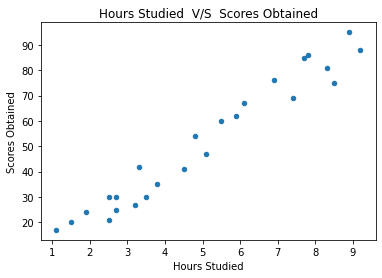

In [ ]:
 data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Hours Studied  V/S  Scores Obtained')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

**Dividing Data into Input and Output**

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**Dividing Data into Training Set and Testing Set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [ ]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [ ]:
y_test

array([20, 27, 69, 30, 62])

In [ ]:
len(x_train), len(x_test), len(y_train), len(y_test)

(20, 5, 20, 5)

**Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(x_train,y_train)
print('completed')

completed


**Plotting the Regression Line**

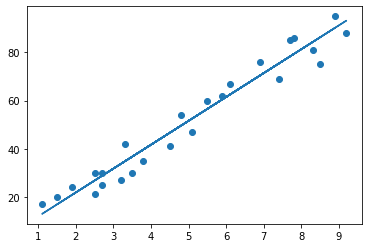

Equation of line y : 9.91065648064224 x + 2.018160041434662


In [ ]:
line = Lr.coef_*x+Lr.intercept_
 
#plotting for testing data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()
print(('Equation of line y :'), str(Lr.coef_[0]), ('x +'), str(Lr.intercept_))

**Testing the Model**

In [ ]:
print('Training Score : ', round(Lr.score(x_train,y_train)*100,2),'%')
print('Testing Score : ', round(Lr.score(x_test,y_test)*100,2),'%')

Training Score :  95.16 %
Testing Score :  94.55 %


**Comparing Actual vs Predicted**

In [ ]:
y_pred = Lr.predict(x_test)
 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Model Evaluation**

In [ ]:
 from sklearn.metrics import r2_score
from math import sqrt
from sklearn import metrics
 
k = x_test.shape[1]
n = len(x_test)
r2 = r2_score(y_test,y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
 
print('R2 = ',r2,'\nAdjusted R2 = ',adj_r2)
 
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_pred))

R2 =  0.9454906892105354 
Adjusted R2 =  0.9273209189473804
Mean Absolute error :  4.183859899002982


**Data Prediction**

In [ ]:
 Hours = 9.25
pred = Lr.predict([[Hours]])
print('Number of Hours : {}'.format(Hours))
print('Predicted Score : {}'.format(pred[0]))

Number of Hours : 9.25
Predicted Score : 93.69173248737539
